In [117]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns


## Loading

In [118]:
anime = pd.read_csv('anime.csv', delimiter=',')
rating = pd.read_csv('rating.csv', delimiter=',')

In [119]:
display(anime.head())
print("Number of diffrent Anime Programs: ",anime.shape[0])
print("Number of features in the dataset: ",anime.shape[1],anime.columns.values)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Number of diffrent Anime Programs:  12294
Number of features in the dataset:  7 ['anime_id' 'name' 'genre' 'type' 'episodes' 'rating' 'members']


In [120]:
def first_look(df):
    print('dataset shape: \n')
    print('number of rows: ',df.shape[0],' number of columns: ',df.shape[1])
    print('dataset column names: \n')
    print(df.columns)
    print('columns data-type')
    print(df.dtypes)
    print('missing data')
    c=df.isnull().sum()
    print(c[c>0])

Anime dataset

In [121]:
first_look(anime)

dataset shape: 

number of rows:  12294  number of columns:  7
dataset column names: 

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
columns data-type
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object
missing data
genre      62
type       25
rating    230
dtype: int64


In [122]:
print("Data type and Null Values: ")
display(anime.info())

print("\nStatistics about the dataset: ")
display(anime["rating"].describe())

Data type and Null Values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


None


Statistics about the dataset: 


count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [123]:
anime["rating"]=anime["rating"].fillna(anime["rating"].mean())
anime["genre"]=anime["genre"].fillna(anime["genre"].mode()[0])
anime["type"]=anime["type"].fillna(anime["type"].mode()[0])
#Change unknown "episode" values to 0.
anime.loc[anime["episodes"] == "Unknown", "episodes"] = 0
anime["episodes"] = anime["episodes"].astype(int)

In [124]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

rating dataset

In [125]:
first_look(rating)

dataset shape: 

number of rows:  7813737  number of columns:  3
dataset column names: 

Index(['user_id', 'anime_id', 'rating'], dtype='object')
columns data-type
user_id     int64
anime_id    int64
rating      int64
dtype: object
missing data
Series([], dtype: int64)


In [126]:
display(rating.head())
print("Number of entries in the dataset: ",rating.shape[0])
print("Number of features in the dataset: ",rating.shape[1])
print("The features are: ",rating.columns.values)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Number of entries in the dataset:  7813737
Number of features in the dataset:  3
The features are:  ['user_id' 'anime_id' 'rating']


In [127]:
anime = anime.drop_duplicates(subset=['name']).reset_index(drop = True)
rating = rating.drop_duplicates().reset_index(drop=True)

In [128]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

## EDA

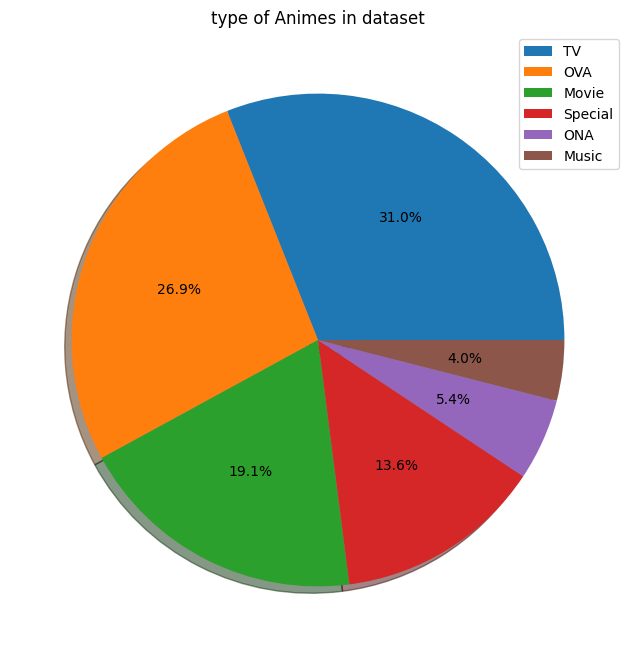

In [129]:
anime['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('type of Animes in dataset')
plt.ylabel('')
plt.legend(anime['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

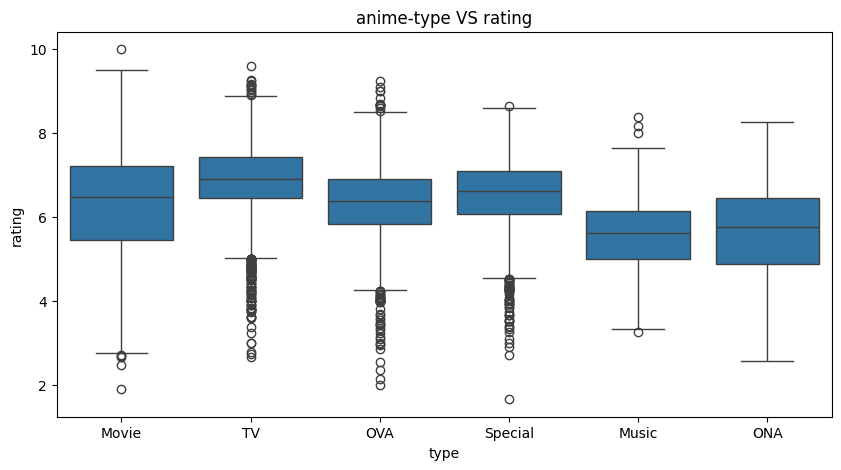

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='rating',data=anime)
plt.title('anime-type VS rating')
plt.show()

In [131]:
for i in anime['type'].unique().tolist():
    print('mean of '+str(i)+' :\n')
    print(anime[anime['type']==i]['rating'].mean())

mean of Movie :

6.321794111781779
mean of TV :

6.886453341665367
mean of OVA :

6.375995603734678
mean of Special :

6.523352928672379
mean of Music :

5.588995901639344
mean of ONA :

5.652120351801017


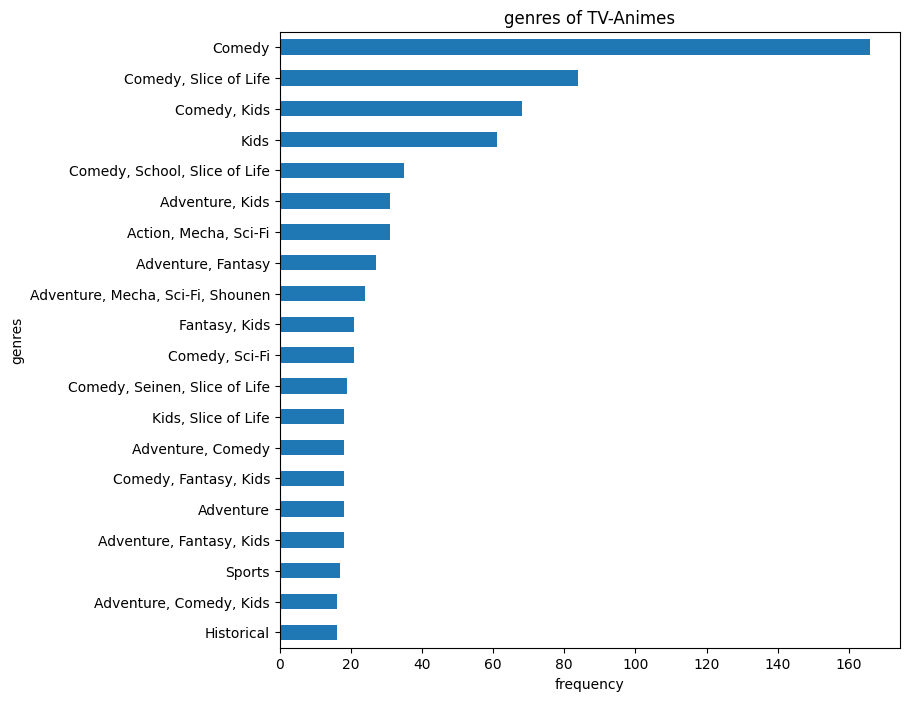

In [132]:
TV_anime=anime[anime['type']=='TV']
TV_anime['genre'].value_counts().sort_values(ascending=True).tail(20).plot.barh(figsize=(8,8))
plt.title('genres of TV-Animes')
plt.xlabel('frequency')
plt.ylabel('genres')
plt.show()

In [133]:
TV_anime.drop('anime_id',axis=1).describe()

,episodes,rating,members
count,3812.000000,3812.000000,3.812000e+03
mean,33.710913,6.886453,4.244660e+04
std,78.599773,0.851250,8.888237e+04
min,0.000000,2.670000,1.100000e+01
25%,12.000000,6.470000,4.830000e+02
50%,24.000000,6.900000,5.896500e+03
75%,39.000000,7.440000,4.372800e+04
max,1818.000000,9.600000,1.013917e+06


let's see which TV anime has the maximum episodes, and which has the minimum

In [134]:
TV_anime[TV_anime['episodes']==TV_anime['episodes'].max()]

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160


In [135]:
TV_anime[TV_anime['episodes']==TV_anime['episodes'].min()]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0,8.580000,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,0,8.250000,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,0,7.940000,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,0,7.730000,26267
1272,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,0,7.610000,17571
...,...,...,...,...,...,...,...
11102,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,0,6.473902,381
11104,34467,Yami Shibai 4th Season,"Dementia, Horror, Supernatural",TV,0,6.473902,1838
11105,32615,Youjo Senki,"Magic, Military",TV,0,6.473902,6652
12250,34382,Citrus,"Drama, Romance, School, Yuri",TV,0,6.473902,2459


let's see which TV anime has the maximum rating, and which has the minimum

In [136]:
TV_anime[TV_anime['rating']==TV_anime['rating'].max()]

,anime_id,name,genre,type,episodes,rating,members
10398,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,0,9.6,47


In [137]:
TV_anime[TV_anime['rating']==TV_anime['rating'].min()]

,anime_id,name,genre,type,episodes,rating,members
9854,29435,Ongaku Sekai Ryokou,"Kids, Music",TV,0,2.67,45


let's see which TV anime has the maximum members, and which has the minimum

In [138]:
TV_anime[TV_anime['members']==TV_anime['members'].max()]


,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [139]:
TV_anime[TV_anime['members']==TV_anime['members'].min()]

,anime_id,name,genre,type,episodes,rating,members
10988,34485,Ganko-chan,Hentai,TV,0,6.473902,11


let's see the distribution plots of rating, members

C:\Users\jermi\AppData\Local\Temp\ipykernel_21748\1760438478.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TV_anime[i],ax=ax)
C:\Users\jermi\AppData\Local\Temp\ipykernel_21748\1760438478.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TV_anime[i],ax=ax)


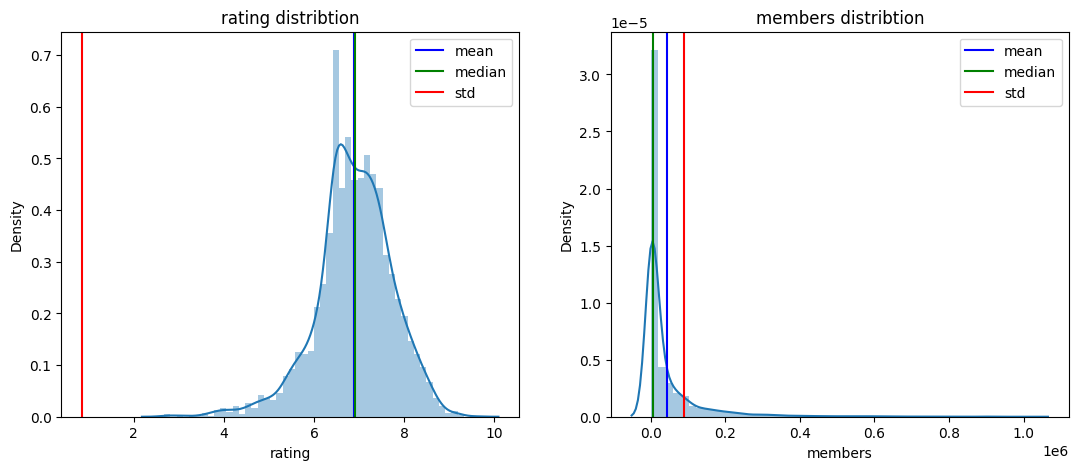

In [140]:
fig=plt.figure(figsize=(13,5))
for i,j in zip(TV_anime[['rating','members']].columns,range(3)):
    ax=fig.add_subplot(1,2,j+1)
    sns.distplot(TV_anime[i],ax=ax)
    plt.axvline(TV_anime[i].mean(),label='mean',color='blue')
    plt.axvline(TV_anime[i].median(),label='median',color='green')
    plt.axvline(TV_anime[i].std(),label='std',color='red')
    plt.title('{} distribtion'.format(i))
    plt.legend()
plt.show()

In [141]:
rating['user_id'].max()

73516

In [142]:
MRPU = rating.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [143]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [144]:
user = pd.merge(rating,MRPU,on=['user_id','user_id'])

In [145]:
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [146]:
user = user.drop(user[user.rating < 0].index)

In [147]:
print(user.shape)

(6337240, 4)


In [148]:
user = user.rename({'rating':'userRating'}, axis='columns')

In [149]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,5.687023
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889


In [150]:
len(mergedata['anime_id'].unique())

9925

In [151]:
mergedata.shape

(6337236, 10)

In [152]:
mergedata.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
userRating     0
mean_rating    0
dtype: int64

In [116]:
mergedata[['rating','userRating']].min()

rating        2.0
userRating    1.0
dtype: float64

In [153]:
mergedata.to_csv("merged_anime_data.csv", index=False)